<a href="https://colab.research.google.com/github/Sereenamariyam/Data-Analysis/blob/main/Houseprice_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Overview
Load the dataset House_Pricing.csv
Display basic information about the dataset using .info() and .describe() to understand the features, data types, and any initial insights into missing values.

In [2]:
import pandas as pd


df = pd.read_csv('House_Pricing.csv')


print(df.info())
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,21613,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613,2124,...,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
unique,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,15 April 2016,NaN,NaN,NaN,NaN,NaN,NaN,No,Twice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2231,NaN,NaN,NaN,NaN,NaN,NaN,21450,963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,NaN,NaN,...,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,NaN,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,NaN,NaN,...,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,NaN,NaN,...,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,NaN,NaN,...,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,NaN,NaN,...,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,NaN,NaN,...,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


# Duplicate Removal
1. Rows: Check for duplicate rows in the dataset, if any, and remove them.
2. Columns: Identify and drop duplicate columns, if any, based on their values.

In [3]:
print("Duplicate rows before removal:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicate rows before removal: 0


In [4]:
df = df.loc[:, ~df.T.duplicated()]
df = df.drop(columns=['Date House was Sold'],axis=1)


# Handling Missing Values

1.   For numerical columns, use imputation techniques like mean/median imputation.
2.  For categorical columns, fill with mode.


Identify missing values in each column.
Handle missing values:


In [5]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


,0
No of Times Visited,19489
Flat Area (in Sqft),9
Lot Area (in Sqft),9
Sale Price,4
No of Bathrooms,4
Area of the House from Basement (in Sqft),3
Zipcode,1
Latitude,1
Longitude,1
Living Area after Renovation (in Sqft),1


In [6]:
from sklearn.impute import SimpleImputer

# Separate columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute numerical
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Impute categorical
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
df


,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7.129301e+09,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,Twice,Fair,7.0,1180.0,0.0,63.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,Twice,Fair,7.0,2170.0,400.0,67.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,180000.0,2.0,1.00,770.0,10000.0,1.0,No,Twice,Fair,6.0,770.0,0.0,85.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,Twice,Excellent,7.0,1050.0,910.0,53.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,Twice,Fair,8.0,1680.0,0.0,31.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2.630000e+08,360000.0,3.0,2.50,1530.0,1131.0,3.0,No,Twice,Fair,8.0,1530.0,0.0,9.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0
21609,6.600060e+09,400000.0,4.0,2.50,2310.0,5813.0,2.0,No,Twice,Fair,8.0,2310.0,0.0,4.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21610,1.523300e+09,402101.0,2.0,0.75,1020.0,1350.0,2.0,No,Twice,Fair,7.0,1020.0,0.0,9.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21611,2.913101e+08,400000.0,3.0,2.50,1600.0,2388.0,2.0,No,Twice,Fair,8.0,1600.0,0.0,14.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0


# Outlier Removal
Perform an outlier detection analysis on numerical variables (e.g., using the IQR method).
Remove outliers from these features if they are not representative of typical house prices.

In [7]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("✅ Outliers clipped using IQR method.")


✅ Outliers clipped using IQR method.


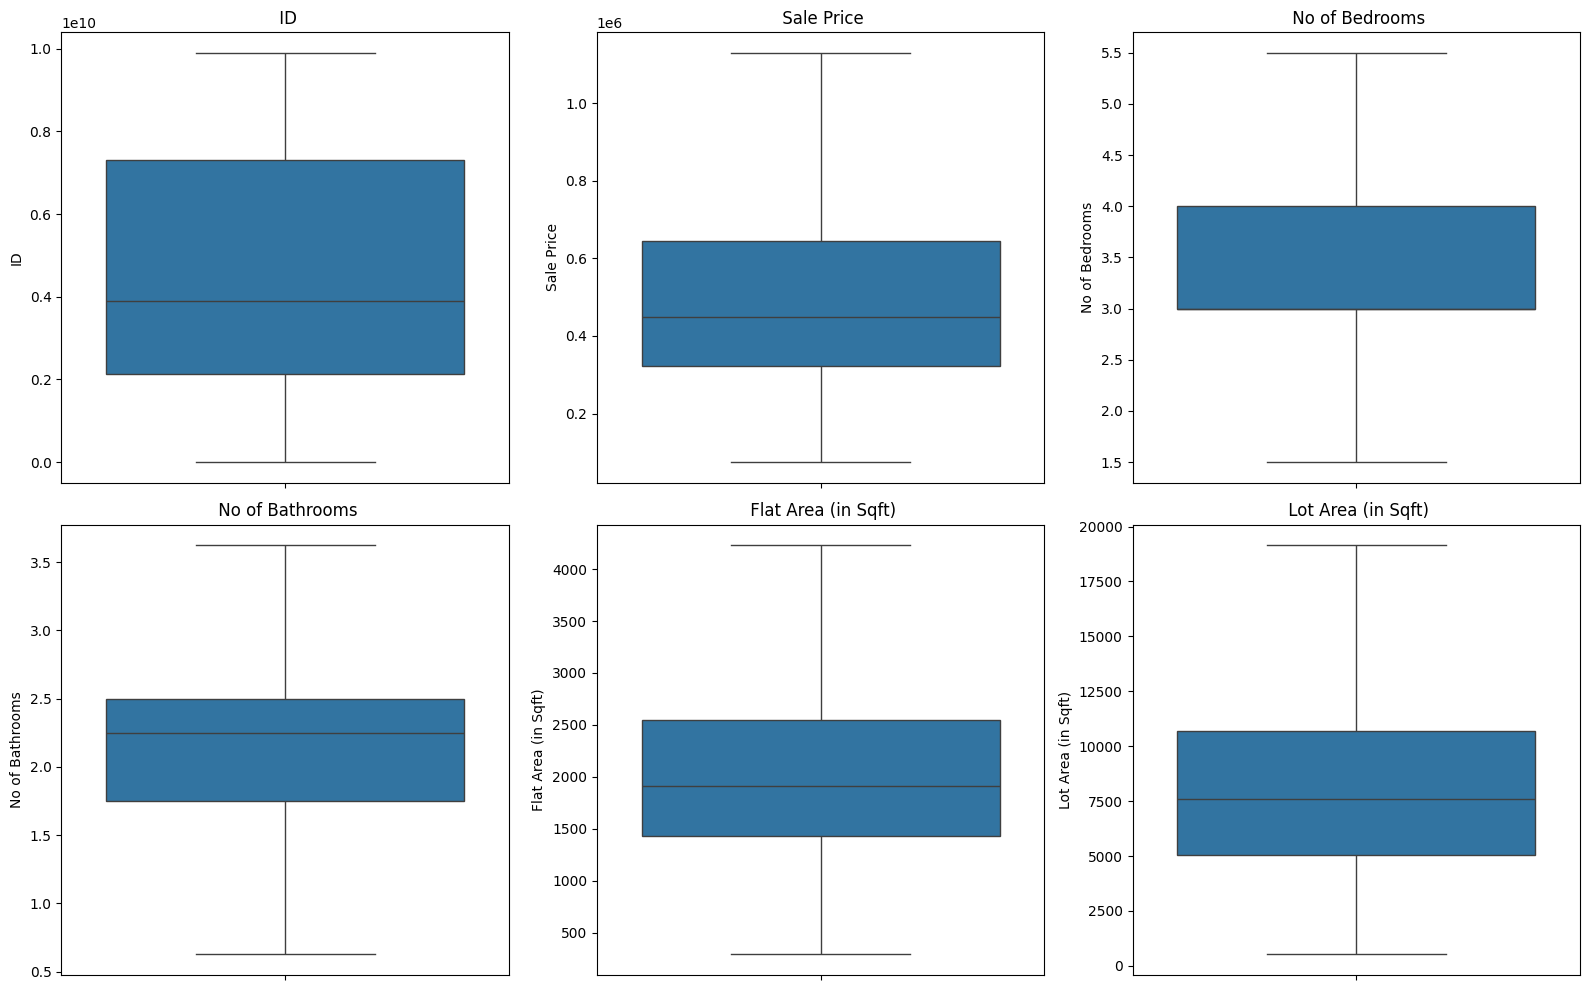

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols[:6]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f' {col}')
    plt.tight_layout()

In [9]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Encoding Categorical Variables
Identify all categorical columns in the dataset.
Apply appropriate encoding techniques:
Use One-Hot Encoding for nominal categories.
Use Label Encoding for ordinal categories, if applicable.

In [10]:
from sklearn.preprocessing import LabelEncoder

df = pd.get_dummies(df,dtype=int, columns=['Waterfront View','No of Times Visited','Condition of the House'],drop_first=True)



# Scaling Numerical Variables
Identify all numerical columns (excluding the target variable SalePrice).
Scale these features using techniques like Min-Max scaling or Standard scaling.


In [11]:
from sklearn.preprocessing import StandardScaler

numerical = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Sale Price'])

scaler = StandardScaler()
df[numerical.columns] = scaler.fit_transform(df[numerical.columns])
df


,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_Yes,No of Times Visited_Once,No of Times Visited_Thrice,No of Times Visited_Twice,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,0.886146,221900.0,-0.424771,-1.521625,-1.046604,-0.605504,-0.915427,-0.595332,-0.771724,-0.681086,...,-0.978599,-0.606904,-0.087173,-0.124903,-0.155458,0.238258,-0.292277,0.735102,-0.596999,-0.089566
1,0.637511,538000.0,-0.424771,0.209892,0.610470,-0.289833,0.936506,-0.595332,0.524305,0.278021,...,-0.439292,-0.151065,-0.087173,-0.124903,-0.155458,0.238258,-0.292277,0.735102,-0.596999,-0.089566
2,0.365444,180000.0,-1.595614,-1.521625,-1.535382,0.257037,-0.915427,-1.593889,-1.308463,-0.681086,...,1.147810,-0.054122,-0.087173,-0.124903,-0.155458,0.238258,-0.292277,0.735102,-0.596999,-0.089566
3,-0.727656,604000.0,0.746072,1.248803,-0.116735,-0.734389,-0.915427,-0.595332,-0.941910,1.500881,...,-0.947781,-0.755871,-0.087173,-0.124903,-0.155458,0.238258,3.421411,-1.360356,-0.596999,-0.089566
4,-0.912881,510000.0,-0.424771,-0.136411,-0.450534,-0.123670,-0.915427,0.403225,-0.117164,-0.681086,...,-0.269796,-0.182233,-0.087173,-0.124903,-0.155458,0.238258,-0.292277,0.735102,-0.596999,-0.089566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-1.500888,360000.0,-0.424771,0.556196,-0.629355,-1.501554,2.788439,0.403225,-0.313532,-0.681086,...,-0.685832,-1.555940,-0.087173,-0.124903,-0.155458,0.238258,-0.292277,0.735102,-0.596999,-0.089566
21609,0.702159,400000.0,0.746072,0.556196,0.300514,-0.573183,0.936506,0.403225,0.707582,-0.681086,...,-0.223570,-0.251675,-0.087173,-0.124903,-0.155458,0.238258,-0.292277,0.735102,-0.596999,-0.089566
21610,-1.062751,402101.0,-1.595614,-1.867929,-1.237347,-1.458130,0.936506,-0.595332,-0.981183,-0.681086,...,-1.471679,-1.441808,-0.087173,-0.124903,-0.155458,0.238258,-0.292277,0.735102,-0.596999,-0.089566
21611,-1.491046,400000.0,-0.424771,0.556196,-0.545906,-1.252310,0.936506,0.403225,-0.221894,-0.681086,...,-0.870738,-1.606818,-0.087173,-0.124903,-0.155458,0.238258,-0.292277,0.735102,-0.596999,-0.089566


# Train-Test Split
Set aside the SalePrice column as the target variable.
Split the dataset into training (80%) and testing (20%) sets using the train_test_split function from sklearn.


In [12]:
from sklearn.model_selection import train_test_split

# Step 1: Separate features (X) and target (y)
X = df.drop(columns=['Sale Price'])  # Features
y = df['Sale Price']                 # Target

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Confirm shapes
print("✅ Train-Test Split Completed:")
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


✅ Train-Test Split Completed:
X_train shape: (17290, 24)
X_test shape : (4323, 24)
y_train shape: (17290,)
y_test shape : (4323,)
